In [1]:
# General purpose packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
stopwords.add("amp")
from PIL import Image

# Data processing
import math
import re, string
import emoji
import demoji
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [2]:
def determine_sentiment(score):
    if score < 0:
        return "Negative"
    elif score > 0:
        return "Positive"
    else:
        return "Neutral"

In [3]:
# Clean emojis from text
def strip_emoji(text):
    return demoji.replace(text, '')

# Remove punctuations, links, mentions and \r\n new line characters
def strip_all_entities(text): 
    text = text.replace('\r', '').replace('\n', ' ').replace('\n', ' ').lower() # remove \n and \r and lowercase
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) # remove links and mentions
    text = re.sub(r'[^\x00-\x7f]',r'', text) # remove non utf8/ascii characters such as '\x9a\x91\x97\x9a\x97'
    banned_list= string.punctuation + 'Ã'+'±'+'ã'+'¼'+'â'+'»'+'§'
    table = str.maketrans('', '', banned_list)
    text = text.translate(table)
    return text

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    new_tweet = " ".join(word.strip() for word in re.split('#(?!(?:hashtag)\b)[\w-]+(?=(?:\s+#[\w-]+)*\s*$)', tweet)) # remove last hashtags
    new_tweet2 = " ".join(word.strip() for word in re.split('#|_', new_tweet)) # remove hashtags symbol from words in the middle of the sentence
    return new_tweet2

# Filter special characters such as & and $ present in some words
def filter_chars(a):
    sent = []
    for word in a.split(' '):
        if ('$' in word) | ('&' in word):
            sent.append('')
        else:
            sent.append(word)
    return ' '.join(sent)

def remove_mult_spaces(text): # remove multiple spaces
    return re.sub("\s\s+" , " ", text)

In [4]:
mask = np.array(Image.open("../images/word cloud/twitter.png"))

In [5]:
# Pull Covid stats and split into diff time periods

covid_stats = pd.read_csv("https://covid.ourworldindata.org/data/owid-covid-data.csv", engine="pyarrow")
covid_stats["date"] = pd.to_datetime(covid_stats["date"])
us = covid_stats[covid_stats["location"] == "United States"].set_index("date")
us_start, us_lockdown, us_2020, us_2021, us_2022 = us.query("date < '2020-03-22'"), us.query("date >= '2020-03-22' and date < '2020-05-01'"), us.query("date >= '2020-06-01' and date < '2021-12-01'"), us.query("date >= '2021-01-01' and date < '2022-01-01'"), us.query("date >= '2022-01-01'")

## Start of Covid-19

In [6]:
us_start_cases, us_start_deaths = us_start["new_cases"].dropna(), us_start["new_deaths"].dropna()

In [7]:
start = pd.read_csv("washington_start.csv")
start["date"] = pd.to_datetime(start['date'])
start["date"] = start["date"].dt.tz_convert("Etc/GMT+8")
dates = start["date"]
start.index = dates
start.drop("date", axis=1, inplace=True)
start["renderedContent"] = start['renderedContent'].apply(lambda tweet:str(tweet))
start.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2020-03-21 15:59:31-08:00,https://twitter.com/ginaaarrrrr/status/1241514...,heard folk real,heard folk real,1241514809289510915,https://twitter.com/ginaaarrrrr,1,0,1,0,1241514809289510915,...,NaN,NaN,NaN,"Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,NaN,NaN,NaN
2020-03-21 15:50:50-08:00,https://twitter.com/Micah_Escobedo/status/1241...,apparently medium orgs amp even head need refr...,apparently medium orgs amp even head need refr...,1241512624359170049,https://twitter.com/Micah_Escobedo,0,0,2,0,1241512624359170049,...,NaN,NaN,"[User(username='WHO', id=14499829, displayname...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['Covid_19'],NaN,NaN,NaN,NaN
2020-03-21 15:48:46-08:00,https://twitter.com/freelancerjourn/status/124...,soledadobrien would nice vp stepped podium sai...,soledadobrien would nice vp stepped podium sai...,1241512105800544256,https://twitter.com/freelancerjourn,0,0,2,0,1241448838642180100,...,1.241449e+18,https://twitter.com/soledadobrien,"[User(username='soledadobrien', id=26548315, d...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
2020-03-21 15:38:50-08:00,https://twitter.com/WhiteSandsMT/status/124150...,yes studio open regular business hour keep imm...,yes studio open regular business hour keep imm...,1241509603839324160,https://twitter.com/WhiteSandsMT,0,0,1,1,1241509603839324160,...,NaN,NaN,NaN,"Coordinates(longitude=-76.94844, latitude=38.9...","Place(id='f3f3e88ab848b86b', fullName='Hyattsv...",NaN,NaN,NaN,NaN,NaN
2020-03-21 15:38:08-08:00,https://twitter.com/Richandwine/status/1241509...,met wfualumni standing outside florianadc wait...,met wfualumni standing outside florianadc wait...,1241509428664373250,https://twitter.com/Richandwine,0,0,15,0,1241509428664373250,...,NaN,NaN,"[User(username='WFUAlumni', id=1901670500, dis...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['supportlocalrestaurants'],NaN,NaN,NaN,NaN


In [8]:
sentiment_scores = start['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2020-03-21 15:59:31-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-03-21 15:50:50-08:00    {'neg': 0.183, 'neu': 0.719, 'pos': 0.097, 'co...
2020-03-21 15:48:46-08:00    {'neg': 0.159, 'neu': 0.588, 'pos': 0.253, 'co...
2020-03-21 15:38:50-08:00    {'neg': 0.16, 'neu': 0.431, 'pos': 0.409, 'com...
2020-03-21 15:38:08-08:00    {'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...
                                                   ...                        
2020-01-20 17:25:44-08:00    {'neg': 0.151, 'neu': 0.849, 'pos': 0.0, 'comp...
2020-01-19 21:03:58-08:00    {'neg': 0.0, 'neu': 0.755, 'pos': 0.245, 'comp...
2020-01-17 15:40:36-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-01-17 12:03:13-08:00    {'neg': 0.216, 'neu': 0.784, 'pos': 0.0, 'comp...
2020-01-13 04:52:26-08:00    {'neg': 0.138, 'neu': 0.741, 'pos': 0.122, 'co...
Name: renderedContent, Length: 10967, dtype: object

In [9]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
start["Sentiment"] = sentiment_label
start.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2020-03-21 15:59:31-08:00,https://twitter.com/ginaaarrrrr/status/1241514...,heard folk real,heard folk real,1241514809289510915,https://twitter.com/ginaaarrrrr,1,0,1,0,1241514809289510915,...,NaN,NaN,"Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,NaN,NaN,NaN,Neutral
2020-03-21 15:50:50-08:00,https://twitter.com/Micah_Escobedo/status/1241...,apparently medium orgs amp even head need refr...,apparently medium orgs amp even head need refr...,1241512624359170049,https://twitter.com/Micah_Escobedo,0,0,2,0,1241512624359170049,...,NaN,"[User(username='WHO', id=14499829, displayname...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['Covid_19'],NaN,NaN,NaN,NaN,Negative
2020-03-21 15:48:46-08:00,https://twitter.com/freelancerjourn/status/124...,soledadobrien would nice vp stepped podium sai...,soledadobrien would nice vp stepped podium sai...,1241512105800544256,https://twitter.com/freelancerjourn,0,0,2,0,1241448838642180100,...,https://twitter.com/soledadobrien,"[User(username='soledadobrien', id=26548315, d...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN,Positive
2020-03-21 15:38:50-08:00,https://twitter.com/WhiteSandsMT/status/124150...,yes studio open regular business hour keep imm...,yes studio open regular business hour keep imm...,1241509603839324160,https://twitter.com/WhiteSandsMT,0,0,1,1,1241509603839324160,...,NaN,NaN,"Coordinates(longitude=-76.94844, latitude=38.9...","Place(id='f3f3e88ab848b86b', fullName='Hyattsv...",NaN,NaN,NaN,NaN,NaN,Positive
2020-03-21 15:38:08-08:00,https://twitter.com/Richandwine/status/1241509...,met wfualumni standing outside florianadc wait...,met wfualumni standing outside florianadc wait...,1241509428664373250,https://twitter.com/Richandwine,0,0,15,0,1241509428664373250,...,NaN,"[User(username='WFUAlumni', id=1901670500, dis...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",['supportlocalrestaurants'],NaN,NaN,NaN,NaN,Positive


In [10]:
negative = start[start["Sentiment"] == "Negative"]
neutral = start[start["Sentiment"] == "Neutral"]
positive = start[start["Sentiment"] == "Positive"]

In [11]:
positive.renderedContent.iloc[1277], negative.renderedContent.iloc[1359]

('hopefully new test covid successful accurate know soon fda approves new test could detect coronavirus minute coronaviruspandemic testkits medical hope stayathome',
 'well horrifying coronavirus')

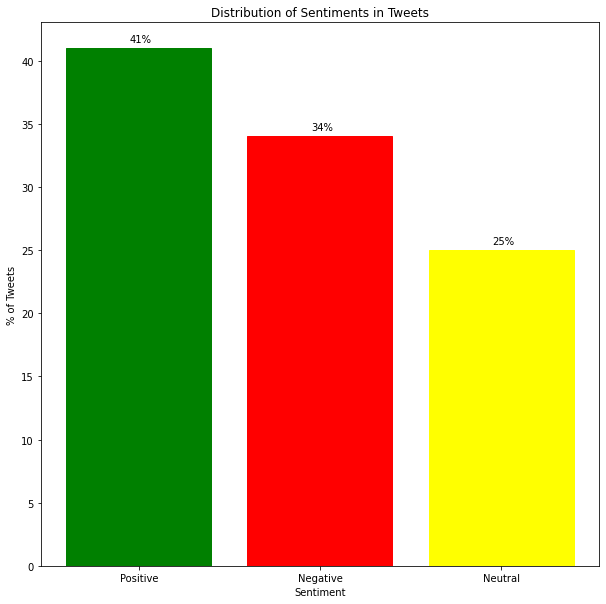

In [12]:
perc_dict = {"Positive": round(len(positive)/len(start)*100), "Negative": round(len(negative)/len(start)*100), "Neutral": round(len(neutral)/len(start)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(start)*100)+0.5, "{}%".format(round(len(positive)/len(start)*100)))
plt.text(1-0.05, round(len(negative)/len(start)*100)+0.5, "{}%".format(round(len(negative)/len(start)*100)))
plt.text(2-0.05, round(len(neutral)/len(start)*100)+0.5, "{}%".format(round(len(neutral)/len(start)*100)))
plt.show()

## Word Clouds

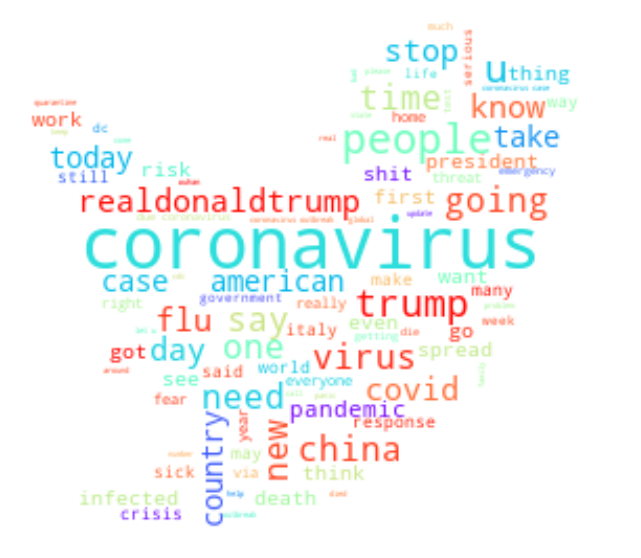

In [13]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

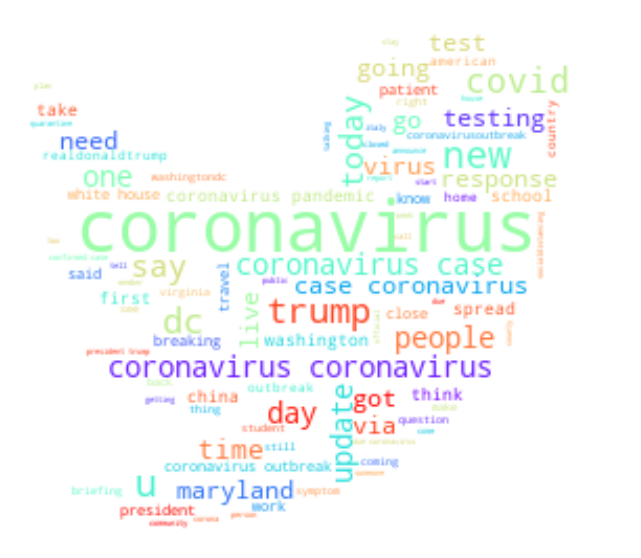

In [14]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

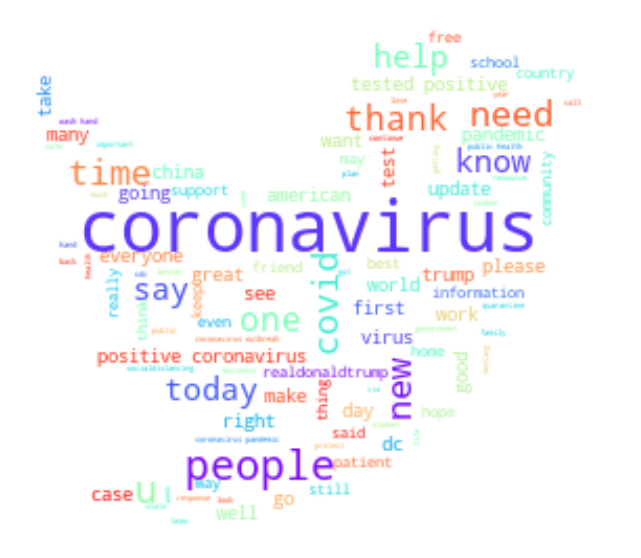

In [15]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [16]:
resampled_us_start_cases = us_start_cases.resample("W-MON").sum()
resampled_us_start_deaths = us_start_deaths.resample("W-MON").sum()
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

In [17]:
positive_cases_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_start_cases.iloc[2:].values)
positive_death_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_start_deaths.iloc[2:].values)
negative_cases_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_start_cases.iloc[1:].values)
negative_death_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_start_deaths.iloc[1:].values)
positive_cases_corr[0, 1], positive_death_corr[0, 1], negative_cases_corr[0, 1], negative_death_corr[0, 1] 

(0.6342434659170492,
 0.6796939173624296,
 0.5867940668020042,
 0.6393656243761664)

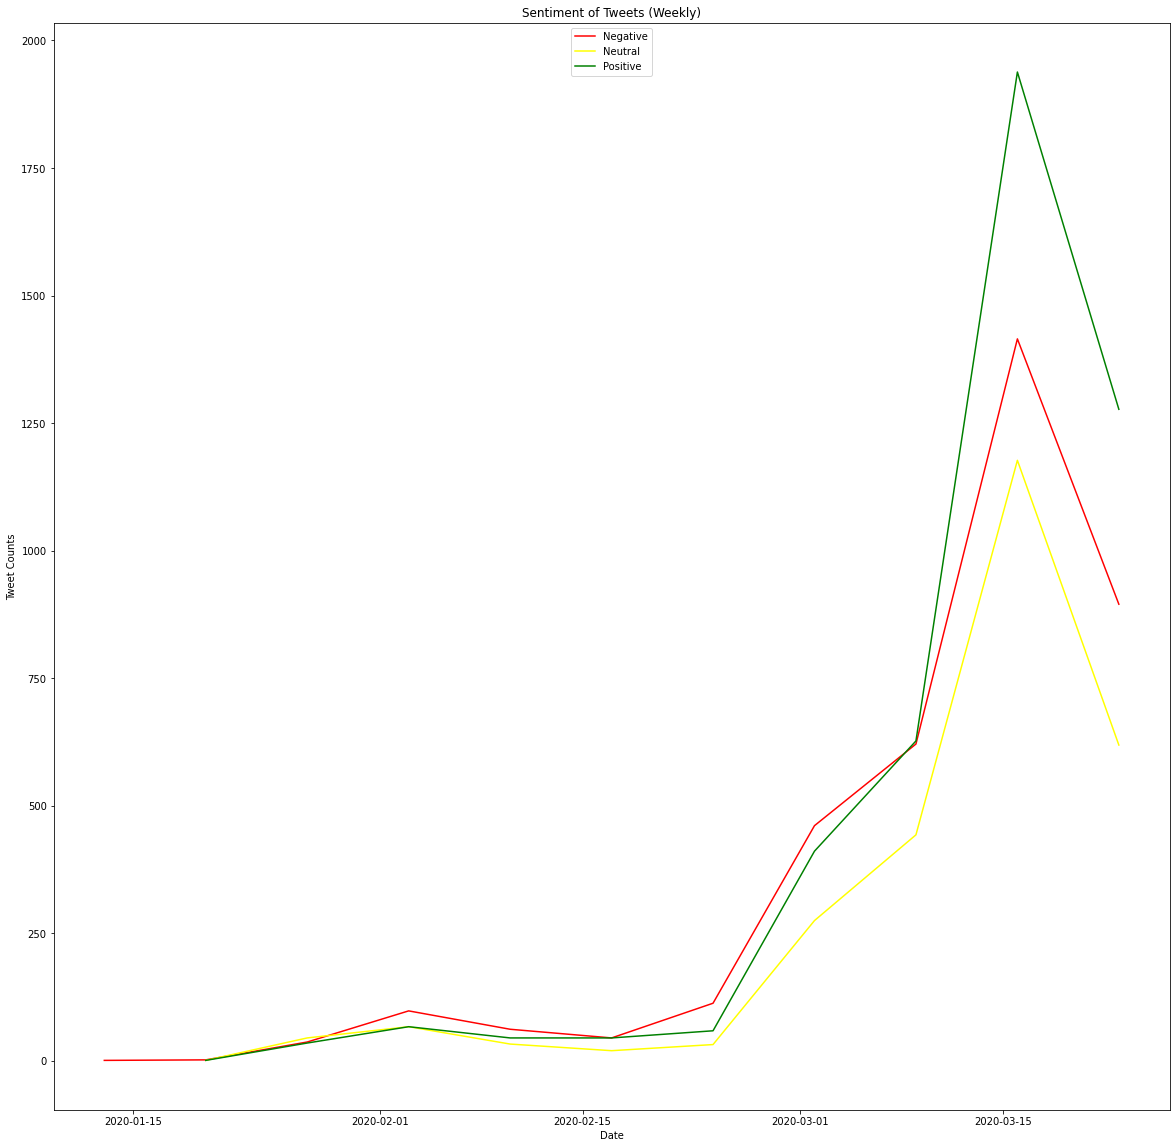

In [18]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()

## Lockdown

In [19]:
us_lockdown_cases, us_lockdown_deaths = us_lockdown["new_cases"].dropna(), us_lockdown["new_deaths"].dropna()

In [20]:
lockdown = pd.read_csv("washington_circuit.csv")
lockdown["date"] = pd.to_datetime(lockdown['date'])
lockdown["date"] = lockdown["date"].dt.tz_convert("Etc/GMT+8")
dates = lockdown["date"]
lockdown.index = dates
lockdown.drop("date", axis=1, inplace=True)
lockdown["renderedContent"] = lockdown['renderedContent'].apply(lambda tweet:str(tweet))
lockdown.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2020-04-30 15:46:43-08:00,https://twitter.com/nitababyx3/status/12560071...,hahahahah see covid,hahahahah see covid,1256007102948151302,https://twitter.com/nitababyx3,0,0,0,0,1255999835460833282,...,1.256004e+18,https://twitter.com/sobihawk,"[User(username='0konkwo', id=14273216924062883...","Coordinates(longitude=-77.252481, latitude=38....","Place(id='01c8b21330402f48', fullName='Newingt...",NaN,NaN,NaN,NaN,NaN
2020-04-30 15:24:09-08:00,https://twitter.com/atrupar/status/12560014221...,astounding many people like brian kilmeade amp...,astounding many people like brian kilmeade amp...,1256001422132420611,https://twitter.com/atrupar,111,377,1478,16,1256001422132420611,...,NaN,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
2020-04-30 15:17:56-08:00,https://twitter.com/NichelleBorden/status/1255...,diddy make think much power hold whole ethnici...,diddy make think much power hold whole ethnici...,1255999859896844288,https://twitter.com/NichelleBorden,0,0,0,0,1255999859896844288,...,NaN,NaN,"[User(username='Diddy', id=18220175, displayna...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...","['StopTheDumbStuff', 'Biden2020', 'BlackPeople...",NaN,NaN,NaN,NaN
2020-04-30 15:17:50-08:00,https://twitter.com/nitababyx3/status/12559998...,covid something new pick line huh good love,covid something new pick line huh good love,1255999835460833282,https://twitter.com/nitababyx3,2,0,8,1,1255999835460833282,...,NaN,NaN,NaN,"Coordinates(longitude=-77.252481, latitude=38....","Place(id='01c8b21330402f48', fullName='Newingt...",NaN,NaN,NaN,NaN,NaN
2020-04-30 14:59:28-08:00,https://twitter.com/andfogle/status/1255995213...,month old want think comparatively prison poli...,month old want think comparatively prison poli...,1255995213644009473,https://twitter.com/andfogle,2,0,0,0,1255917233076830208,...,1.255992e+18,https://twitter.com/Sadeq008,"[User(username='Sadeq008', id=197402758, displ...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN


In [21]:
sentiment_scores = lockdown['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2020-04-30 15:46:43-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-04-30 15:24:09-08:00    {'neg': 0.079, 'neu': 0.755, 'pos': 0.167, 'co...
2020-04-30 15:17:56-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-04-30 15:17:50-08:00    {'neg': 0.0, 'neu': 0.458, 'pos': 0.542, 'comp...
2020-04-30 14:59:28-08:00    {'neg': 0.191, 'neu': 0.493, 'pos': 0.316, 'co...
                                                   ...                        
2020-03-21 16:11:24-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-03-21 16:08:34-08:00    {'neg': 0.25, 'neu': 0.75, 'pos': 0.0, 'compou...
2020-03-21 16:08:18-08:00    {'neg': 0.573, 'neu': 0.427, 'pos': 0.0, 'comp...
2020-03-21 16:01:57-08:00    {'neg': 0.24, 'neu': 0.76, 'pos': 0.0, 'compou...
2020-03-21 16:00:46-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: renderedContent, Length: 12247, dtype: object

In [22]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
lockdown["Sentiment"] = sentiment_label
lockdown.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2020-04-30 15:46:43-08:00,https://twitter.com/nitababyx3/status/12560071...,hahahahah see covid,hahahahah see covid,1256007102948151302,https://twitter.com/nitababyx3,0,0,0,0,1255999835460833282,...,https://twitter.com/sobihawk,"[User(username='0konkwo', id=14273216924062883...","Coordinates(longitude=-77.252481, latitude=38....","Place(id='01c8b21330402f48', fullName='Newingt...",NaN,NaN,NaN,NaN,NaN,Neutral
2020-04-30 15:24:09-08:00,https://twitter.com/atrupar/status/12560014221...,astounding many people like brian kilmeade amp...,astounding many people like brian kilmeade amp...,1256001422132420611,https://twitter.com/atrupar,111,377,1478,16,1256001422132420611,...,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN,Positive
2020-04-30 15:17:56-08:00,https://twitter.com/NichelleBorden/status/1255...,diddy make think much power hold whole ethnici...,diddy make think much power hold whole ethnici...,1255999859896844288,https://twitter.com/NichelleBorden,0,0,0,0,1255999859896844288,...,NaN,"[User(username='Diddy', id=18220175, displayna...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...","['StopTheDumbStuff', 'Biden2020', 'BlackPeople...",NaN,NaN,NaN,NaN,Neutral
2020-04-30 15:17:50-08:00,https://twitter.com/nitababyx3/status/12559998...,covid something new pick line huh good love,covid something new pick line huh good love,1255999835460833282,https://twitter.com/nitababyx3,2,0,8,1,1255999835460833282,...,NaN,NaN,"Coordinates(longitude=-77.252481, latitude=38....","Place(id='01c8b21330402f48', fullName='Newingt...",NaN,NaN,NaN,NaN,NaN,Positive
2020-04-30 14:59:28-08:00,https://twitter.com/andfogle/status/1255995213...,month old want think comparatively prison poli...,month old want think comparatively prison poli...,1255995213644009473,https://twitter.com/andfogle,2,0,0,0,1255917233076830208,...,https://twitter.com/Sadeq008,"[User(username='Sadeq008', id=197402758, displ...","Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN,Positive


In [23]:
negative = lockdown[lockdown["Sentiment"] == "Negative"]
neutral = lockdown[lockdown["Sentiment"] == "Neutral"]
positive = lockdown[lockdown["Sentiment"] == "Positive"]

In [24]:
positive.renderedContent.iloc[2184]

'grateful comfort peace home stay safe stay vigilant stay focused grateful takecareofyourself stayhome socialdistancing strangetimes washington'

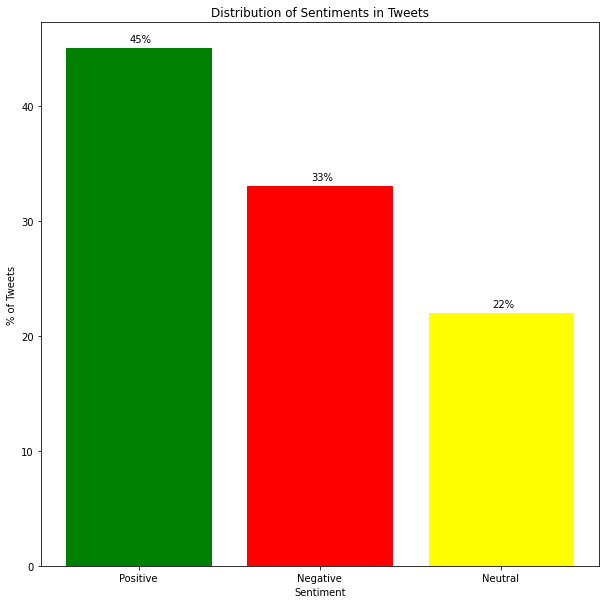

In [25]:
perc_dict = {"Positive": round(len(positive)/len(lockdown)*100), "Negative": round(len(negative)/len(lockdown)*100), "Neutral": round(len(neutral)/len(lockdown)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(lockdown)*100)+0.5, "{}%".format(round(len(positive)/len(lockdown)*100)))
plt.text(1-0.05, round(len(negative)/len(lockdown)*100)+0.5, "{}%".format(round(len(negative)/len(lockdown)*100)))
plt.text(2-0.05, round(len(neutral)/len(lockdown)*100)+0.5, "{}%".format(round(len(neutral)/len(lockdown)*100)))
plt.show()

## Word Clouds

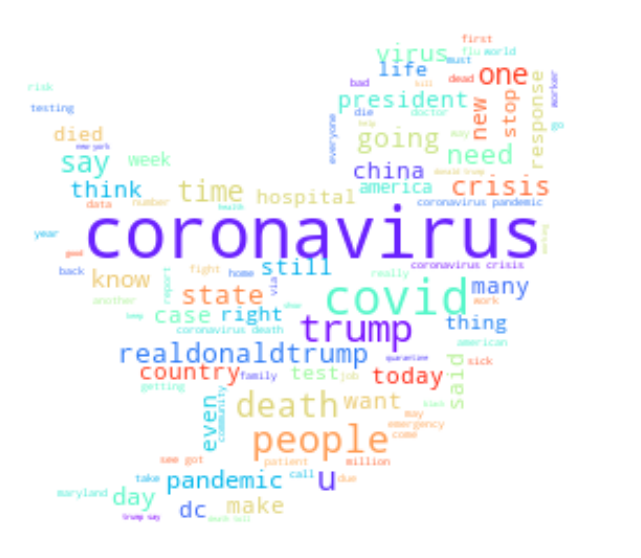

In [26]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

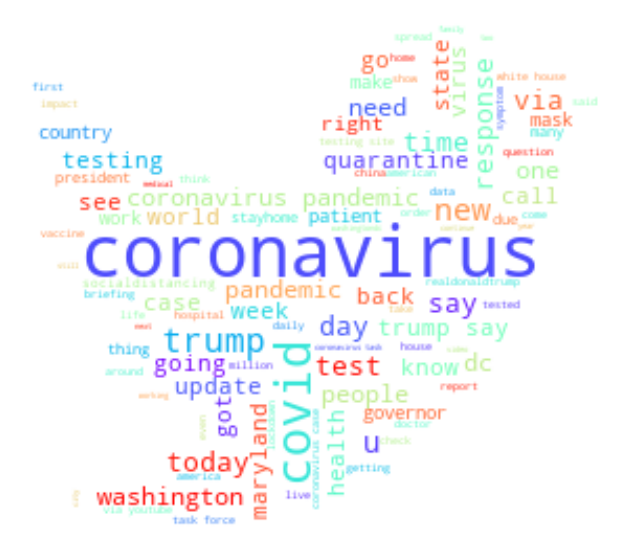

In [27]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

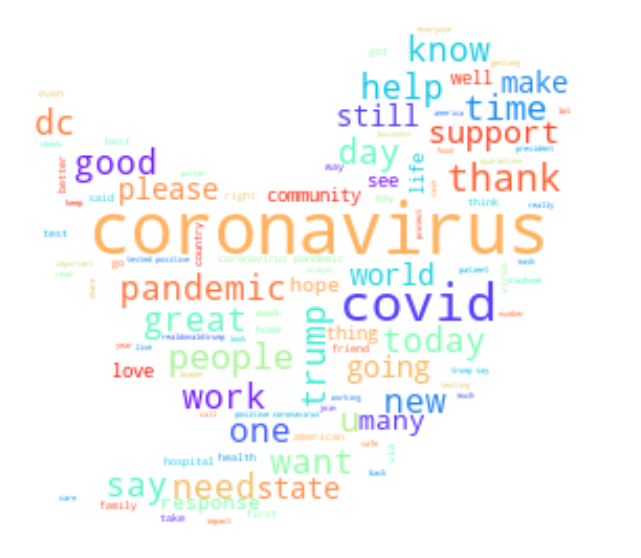

In [28]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [29]:
resampled_us_lockdown_cases = us_lockdown_cases.resample("W-MON").sum()
resampled_us_lockdown_deaths = us_lockdown_deaths.resample("W-MON").sum()
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

In [30]:
positive_cases_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_lockdown_cases.values)
positive_deaths_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_lockdown_deaths.values)
negative_cases_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_lockdown_cases.values)
negative_deaths_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_lockdown_deaths.values)
positive_cases_corr[0, 1], positive_deaths_corr[0, 1], negative_cases_corr[0, 1], negative_deaths_corr[0, 1]

(0.4374708781042128,
 0.0971876901847346,
 0.5332741390564218,
 0.18406558217798125)

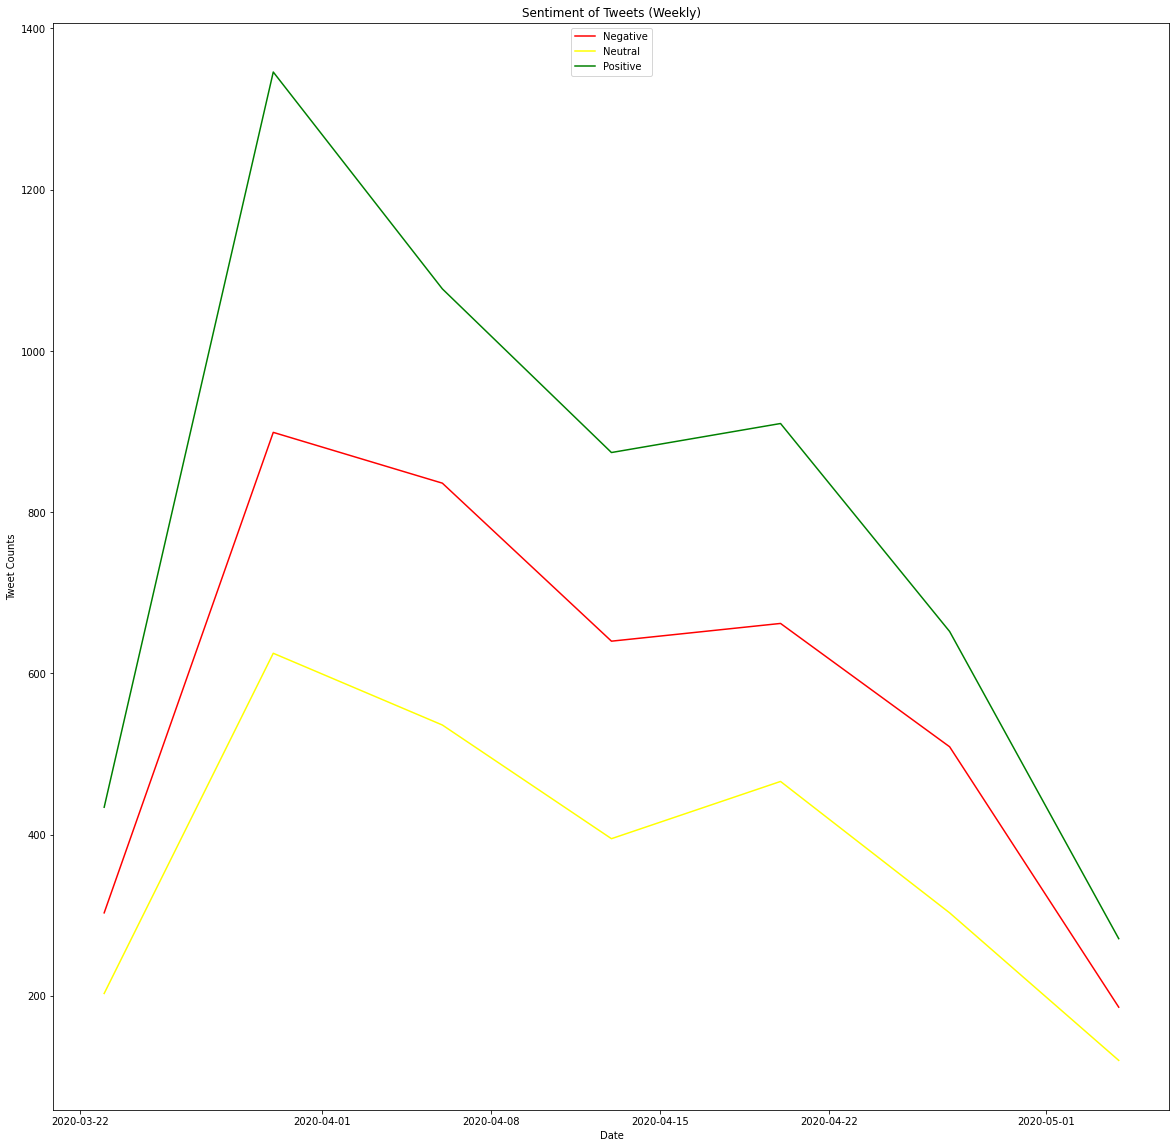

In [31]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()

## Year 2020

In [32]:
us_2020_cases, us_2020_deaths = us_2020["new_cases"].dropna(), us_2020["new_deaths"].dropna()

In [33]:
year_2020 = pd.read_csv("washington_normal_2020.csv")
year_2020["date"] = pd.to_datetime(year_2020['date'])
year_2020["date"] = year_2020["date"].dt.tz_convert("Etc/GMT+8")
dates = year_2020["date"]
year_2020.index = dates
year_2020.drop("date", axis=1, inplace=True)
year_2020["renderedContent"] = year_2020['renderedContent'].apply(lambda tweet:str(tweet))
year_2020.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 15:42:28-08:00,https://twitter.com/TeeJ_Apple/status/13447910...,well lost weight ate healthy fail though came ...,well lost weight ate healthy fail though came ...,1344791061986762753,https://twitter.com/TeeJ_Apple,1,0,1,0,1344791061986762753,...,NaN,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
2020-12-31 15:13:10-08:00,https://twitter.com/MattyCj22/status/134478368...,covid took legend rest power,covid took legend rest power,1344783686659678210,https://twitter.com/MattyCj22,0,0,1,0,1344783686659678210,...,NaN,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN
2020-12-31 14:57:11-08:00,https://twitter.com/aikers99/status/1344779663...,realdonaldtrump december country plunged would...,realdonaldtrump december country plunged would...,1344779663852367873,https://twitter.com/aikers99,0,0,0,0,1344717975891402759,...,1.344718e+18,https://twitter.com/realDonaldTrump,"[User(username='realDonaldTrump', id=25073877,...","Coordinates(longitude=-77.335163, latitude=38....","Place(id='e4aee3ab11ef52a6', fullName='Fairfax...",NaN,NaN,NaN,NaN,NaN
2020-12-31 14:42:31-08:00,https://twitter.com/noramurray/status/13447759...,seems hard celebrate ending difficult year peo...,seems hard celebrate ending difficult year peo...,1344775974668423168,https://twitter.com/noramurray,0,0,3,0,1344775974668423168,...,NaN,NaN,NaN,"Coordinates(longitude=-79.487651, latitude=37....","Place(id='dea1eac2d7ef8878', fullName='Marylan...",NaN,NaN,NaN,NaN,NaN
2020-12-31 14:36:59-08:00,https://twitter.com/laurvanhasselt/status/1344...,lmfaoooo covid b like,lmfaoooo covid b like,1344774581995896837,https://twitter.com/laurvanhasselt,1,0,0,0,1344762273861152780,...,1.344771e+18,https://twitter.com/ChillWill63,"[User(username='ChillWill63', id=2919643282, d...","Coordinates(longitude=-79.487651, latitude=37....","Place(id='dea1eac2d7ef8878', fullName='Marylan...",NaN,NaN,NaN,NaN,NaN


In [34]:
sentiment_scores = year_2020['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2020-12-31 15:42:28-08:00    {'neg': 0.254, 'neu': 0.342, 'pos': 0.405, 'co...
2020-12-31 15:13:10-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-12-31 14:57:11-08:00    {'neg': 0.281, 'neu': 0.719, 'pos': 0.0, 'comp...
2020-12-31 14:42:31-08:00    {'neg': 0.1, 'neu': 0.358, 'pos': 0.542, 'comp...
2020-12-31 14:36:59-08:00    {'neg': 0.0, 'neu': 0.444, 'pos': 0.556, 'comp...
                                                   ...                        
2020-04-30 17:33:55-08:00    {'neg': 0.15, 'neu': 0.526, 'pos': 0.323, 'com...
2020-04-30 17:14:49-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-04-30 16:35:24-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-04-30 16:17:57-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2020-04-30 16:00:35-08:00    {'neg': 0.109, 'neu': 0.674, 'pos': 0.218, 'co...
Name: renderedContent, Length: 29589, dtype: object

In [35]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
year_2020["Sentiment"] = sentiment_label
year_2020.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2020-12-31 15:42:28-08:00,https://twitter.com/TeeJ_Apple/status/13447910...,well lost weight ate healthy fail though came ...,well lost weight ate healthy fail though came ...,1344791061986762753,https://twitter.com/TeeJ_Apple,1,0,1,0,1344791061986762753,...,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN,Positive
2020-12-31 15:13:10-08:00,https://twitter.com/MattyCj22/status/134478368...,covid took legend rest power,covid took legend rest power,1344783686659678210,https://twitter.com/MattyCj22,0,0,1,0,1344783686659678210,...,NaN,NaN,"Coordinates(longitude=-77.119401, latitude=38....","Place(id='01fbe706f872cb32', fullName='Washing...",NaN,NaN,NaN,NaN,NaN,Neutral
2020-12-31 14:57:11-08:00,https://twitter.com/aikers99/status/1344779663...,realdonaldtrump december country plunged would...,realdonaldtrump december country plunged would...,1344779663852367873,https://twitter.com/aikers99,0,0,0,0,1344717975891402759,...,https://twitter.com/realDonaldTrump,"[User(username='realDonaldTrump', id=25073877,...","Coordinates(longitude=-77.335163, latitude=38....","Place(id='e4aee3ab11ef52a6', fullName='Fairfax...",NaN,NaN,NaN,NaN,NaN,Negative
2020-12-31 14:42:31-08:00,https://twitter.com/noramurray/status/13447759...,seems hard celebrate ending difficult year peo...,seems hard celebrate ending difficult year peo...,1344775974668423168,https://twitter.com/noramurray,0,0,3,0,1344775974668423168,...,NaN,NaN,"Coordinates(longitude=-79.487651, latitude=37....","Place(id='dea1eac2d7ef8878', fullName='Marylan...",NaN,NaN,NaN,NaN,NaN,Positive
2020-12-31 14:36:59-08:00,https://twitter.com/laurvanhasselt/status/1344...,lmfaoooo covid b like,lmfaoooo covid b like,1344774581995896837,https://twitter.com/laurvanhasselt,1,0,0,0,1344762273861152780,...,https://twitter.com/ChillWill63,"[User(username='ChillWill63', id=2919643282, d...","Coordinates(longitude=-79.487651, latitude=37....","Place(id='dea1eac2d7ef8878', fullName='Marylan...",NaN,NaN,NaN,NaN,NaN,Positive


In [36]:
negative = year_2020[year_2020["Sentiment"] == "Negative"]
neutral = year_2020[year_2020["Sentiment"] == "Neutral"]
positive = year_2020[year_2020["Sentiment"] == "Positive"]

In [37]:
positive.renderedContent.iloc[271]

'lockdown restriction work stop coronavirus covid vaccine work hopefully distributed fast state experience urgent need'

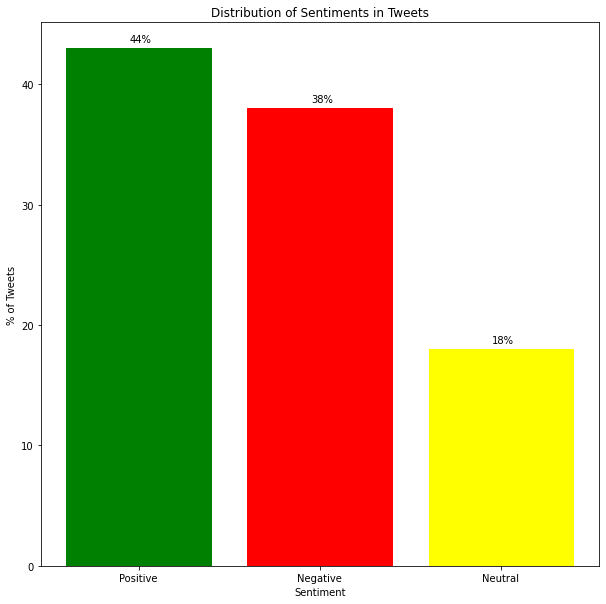

In [38]:
perc_dict = {"Positive": round(len(positive)/len(year_2020)*100), "Negative": round(len(negative)/len(year_2020)*100), "Neutral": round(len(neutral)/len(year_2020)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(year_2020)*100)+0.5, "{}%".format(math.ceil(len(positive)/len(year_2020)*100)))
plt.text(1-0.05, round(len(negative)/len(year_2020)*100)+0.5, "{}%".format(round(len(negative)/len(year_2020)*100)))
plt.text(2-0.05, round(len(neutral)/len(year_2020)*100)+0.5, "{}%".format(round(len(neutral)/len(year_2020)*100)))
plt.show()

## Word Clouds

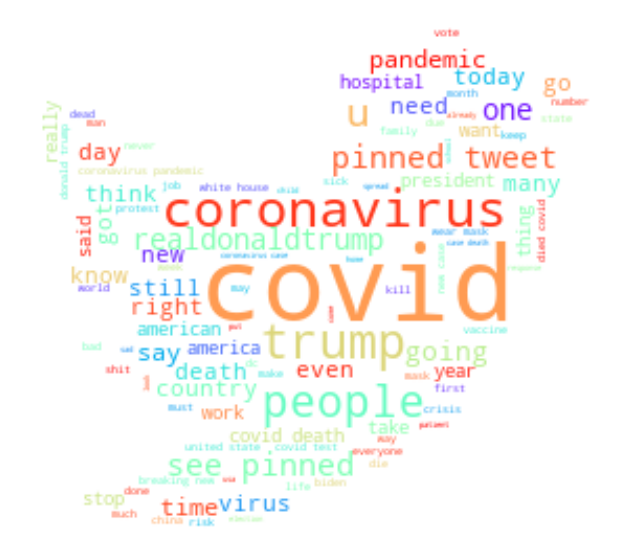

In [39]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

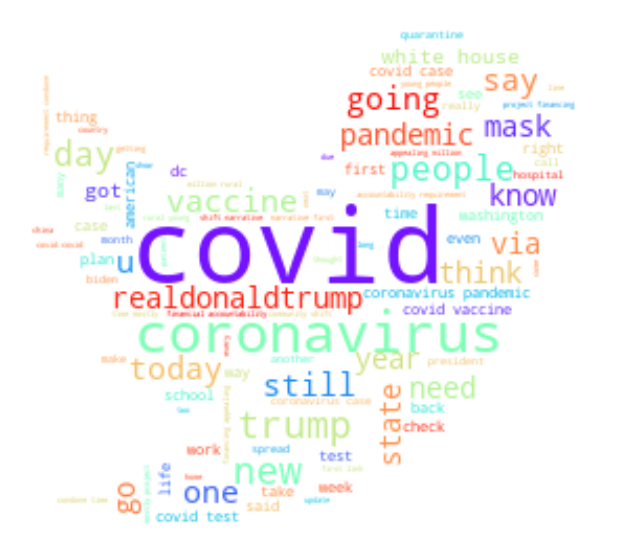

In [40]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

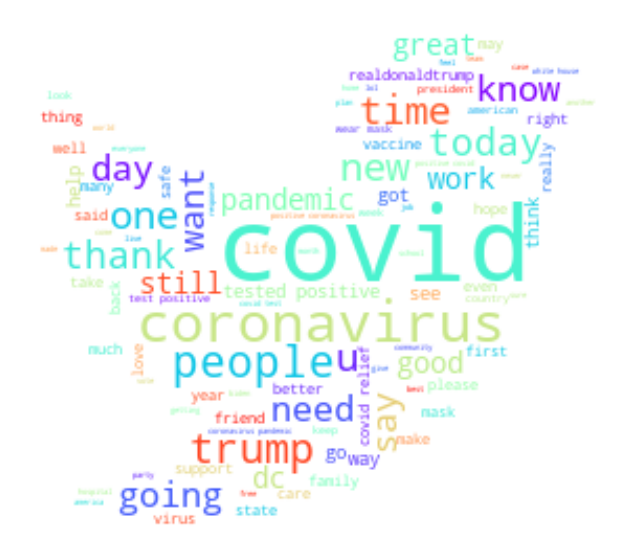

In [41]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [42]:
resampled_us_2020_cases = us_2020_cases.resample("W-MON").sum()
resampled_us_2020_deaths = us_2020_deaths.resample("W-MON").sum()
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

In [45]:
positive_cases_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_2020_cases.iloc[:36].values)
positive_deaths_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_2020_deaths.iloc[:36].values)
negative_cases_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_2020_cases.iloc[:36].values)
negative_deaths_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_2020_deaths.iloc[:36].values)
positive_cases_corr[0, 1], positive_deaths_corr[0, 1], negative_cases_corr[0, 1], negative_deaths_corr[0, 1]

(0.002998608007143863,
 -0.025389195996850834,
 0.133865702984444,
 0.10037822021103207)

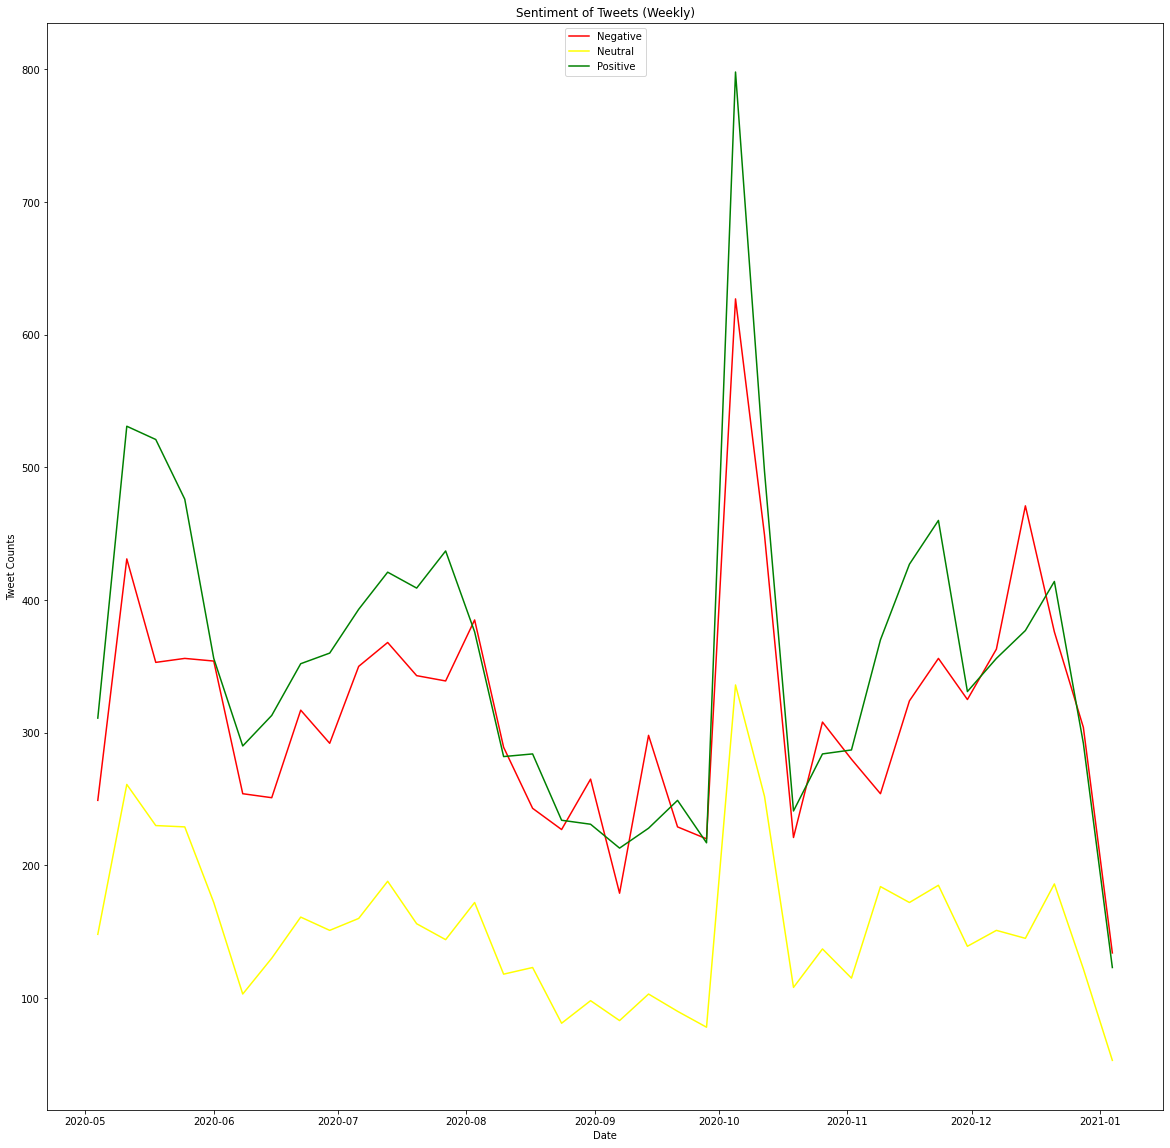

In [46]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()

## Year 2021

In [47]:
us_2021_cases, us_2021_deaths = us_2021["new_cases"].dropna(), us_2021["new_deaths"].dropna()

In [48]:
year_2021 = pd.read_csv("washington_normal_2021.csv")
year_2021["date"] = pd.to_datetime(year_2021['date'])
year_2021["date"] = year_2021["date"].dt.tz_convert("Etc/GMT+8")
dates = year_2021["date"]
year_2021.index = dates
year_2021.drop("date", axis=1, inplace=True)
year_2021["renderedContent"] = year_2021['renderedContent'].apply(lambda tweet:str(tweet))
year_2021.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2021-12-31 15:55:26-08:00,https://twitter.com/troycroz/status/1477065894...,covid week mild kicking final lingering sympto...,covid week mild kicking final lingering sympto...,1477065894404763652,https://twitter.com/troycroz,0,0,1,0,1477065894404763652,...,NaN,NaN,NaN,"Coordinates(longitude=-77.064086, latitude=38....","Place(id='6417871953fa5e86', fullName='Silver ...",NaN,NaN,NaN,NaN,NaN
2021-12-31 15:51:49-08:00,https://twitter.com/Heerak4Congress/status/147...,massachusetts representative ayannapressley an...,massachusetts representative ayannapressley an...,1477064984366616582,https://twitter.com/Heerak4Congress,0,0,0,0,1477064984366616582,...,NaN,NaN,"[User(username='AyannaPressley', id=31013444, ...","Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,SummaryCard(title='Representative Ayanna Press...,NaN,NaN
2021-12-31 15:48:51-08:00,https://twitter.com/Heerak4Congress/status/147...,breaking news new breakthrough covid case mass...,breaking news new breakthrough covid case mass...,1477064237306503172,https://twitter.com/Heerak4Congress,0,0,0,0,1477064237306503172,...,NaN,NaN,"[User(username='GOP', id=11134252, displayname...","Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,"SummaryCard(title='20,247 New Breakthrough Cas...",NaN,NaN
2021-12-31 15:44:49-08:00,https://twitter.com/Heerak4Congress/status/147...,wait next covid vaccine actually block omicron...,wait next covid vaccine actually block omicron...,1477063222654087171,https://twitter.com/Heerak4Congress,0,0,0,0,1477063222654087171,...,NaN,NaN,"[User(username='JoeBiden', id=939091, displayn...","Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,NaN,NaN,NaN
2021-12-31 15:41:37-08:00,https://twitter.com/Heerak4Congress/status/147...,president donald trump condemn expelling usmc ...,president donald trump condemn expelling usmc ...,1477062416471105536,https://twitter.com/Heerak4Congress,0,0,0,0,1477062416471105536,...,NaN,NaN,"[User(username='USMC', id=10126672, displaynam...","Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,SummaryCard(title='Marines kick out 206 troops...,NaN,NaN


In [49]:
sentiment_scores = year_2021['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2021-12-31 15:55:26-08:00    {'neg': 0.226, 'neu': 0.621, 'pos': 0.153, 'co...
2021-12-31 15:51:49-08:00    {'neg': 0.16, 'neu': 0.712, 'pos': 0.128, 'com...
2021-12-31 15:48:51-08:00    {'neg': 0.206, 'neu': 0.71, 'pos': 0.084, 'com...
2021-12-31 15:44:49-08:00    {'neg': 0.08, 'neu': 0.776, 'pos': 0.144, 'com...
2021-12-31 15:41:37-08:00    {'neg': 0.516, 'neu': 0.484, 'pos': 0.0, 'comp...
                                                   ...                        
2021-01-01 11:21:24-08:00    {'neg': 0.42, 'neu': 0.431, 'pos': 0.148, 'com...
2021-01-01 08:36:38-08:00    {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...
2021-01-01 07:05:15-08:00    {'neg': 0.18, 'neu': 0.51, 'pos': 0.31, 'compo...
2021-01-01 02:51:19-08:00    {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...
2020-12-31 16:18:08-08:00    {'neg': 0.339, 'neu': 0.661, 'pos': 0.0, 'comp...
Name: renderedContent, Length: 19680, dtype: object

In [50]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
year_2021["Sentiment"] = sentiment_label
year_2021.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2021-12-31 15:55:26-08:00,https://twitter.com/troycroz/status/1477065894...,covid week mild kicking final lingering sympto...,covid week mild kicking final lingering sympto...,1477065894404763652,https://twitter.com/troycroz,0,0,1,0,1477065894404763652,...,NaN,NaN,"Coordinates(longitude=-77.064086, latitude=38....","Place(id='6417871953fa5e86', fullName='Silver ...",NaN,NaN,NaN,NaN,NaN,Negative
2021-12-31 15:51:49-08:00,https://twitter.com/Heerak4Congress/status/147...,massachusetts representative ayannapressley an...,massachusetts representative ayannapressley an...,1477064984366616582,https://twitter.com/Heerak4Congress,0,0,0,0,1477064984366616582,...,NaN,"[User(username='AyannaPressley', id=31013444, ...","Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,SummaryCard(title='Representative Ayanna Press...,NaN,NaN,Negative
2021-12-31 15:48:51-08:00,https://twitter.com/Heerak4Congress/status/147...,breaking news new breakthrough covid case mass...,breaking news new breakthrough covid case mass...,1477064237306503172,https://twitter.com/Heerak4Congress,0,0,0,0,1477064237306503172,...,NaN,"[User(username='GOP', id=11134252, displayname...","Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,"SummaryCard(title='20,247 New Breakthrough Cas...",NaN,NaN,Negative
2021-12-31 15:44:49-08:00,https://twitter.com/Heerak4Congress/status/147...,wait next covid vaccine actually block omicron...,wait next covid vaccine actually block omicron...,1477063222654087171,https://twitter.com/Heerak4Congress,0,0,0,0,1477063222654087171,...,NaN,"[User(username='JoeBiden', id=939091, displayn...","Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,NaN,NaN,NaN,Positive
2021-12-31 15:41:37-08:00,https://twitter.com/Heerak4Congress/status/147...,president donald trump condemn expelling usmc ...,president donald trump condemn expelling usmc ...,1477062416471105536,https://twitter.com/Heerak4Congress,0,0,0,0,1477062416471105536,...,NaN,"[User(username='USMC', id=10126672, displaynam...","Coordinates(longitude=-77.172219, latitude=38....","Place(id='319ee7b36c9149da', fullName='Arlingt...",NaN,NaN,SummaryCard(title='Marines kick out 206 troops...,NaN,NaN,Negative


In [51]:
negative = year_2021[year_2021["Sentiment"] == "Negative"]
neutral = year_2021[year_2021["Sentiment"] == "Neutral"]
positive = year_2021[year_2021["Sentiment"] == "Positive"]

In [52]:
negative.renderedContent.iloc[37], negative.renderedContent.iloc[71], negative.renderedContent.iloc[1686], negative.renderedContent.iloc[2120]

('year shit especially post covid',
 'feel like shit getting covid booster shot damn china',
 'pushing ineffective amp unsafe existing highly experimental mrna covid vaccine prick conscience fda expert know scientific evidence ten thousand adverse reaction thousand died usa alone documented want part nih',
 'covid breakthrough infection prove current vaccine ineffective vaccine people get chicken pox vaccine get chicken pox given failure current covid vaccine mandating u military unethical need new covid vaccine')

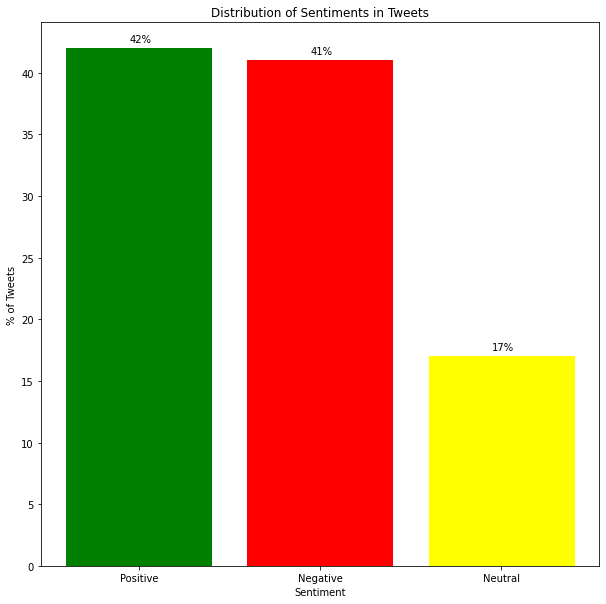

In [53]:
perc_dict = {"Positive": round(len(positive)/len(year_2021)*100), "Negative": round(len(negative)/len(year_2021)*100), "Neutral": round(len(neutral)/len(year_2021)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(year_2021)*100)+0.5, "{}%".format(round(len(positive)/len(year_2021)*100)))
plt.text(1-0.05, round(len(negative)/len(year_2021)*100)+0.5, "{}%".format(round(len(negative)/len(year_2021)*100)))
plt.text(2-0.05, round(len(neutral)/len(year_2021)*100)+0.5, "{}%".format(round(len(neutral)/len(year_2021)*100)))
plt.show()

## Word Clouds

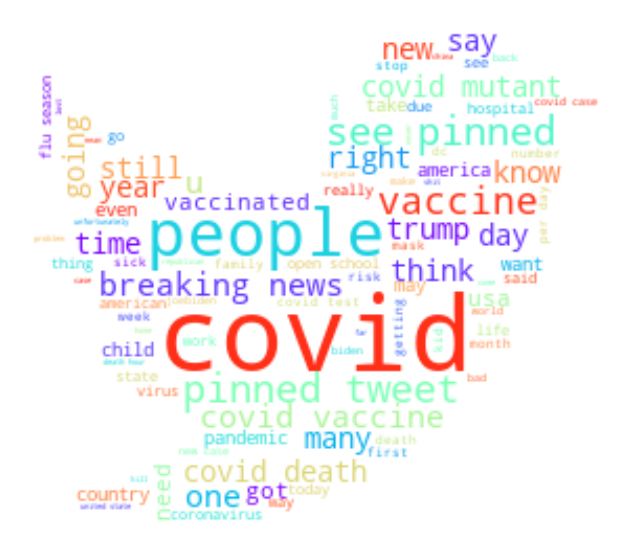

In [54]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

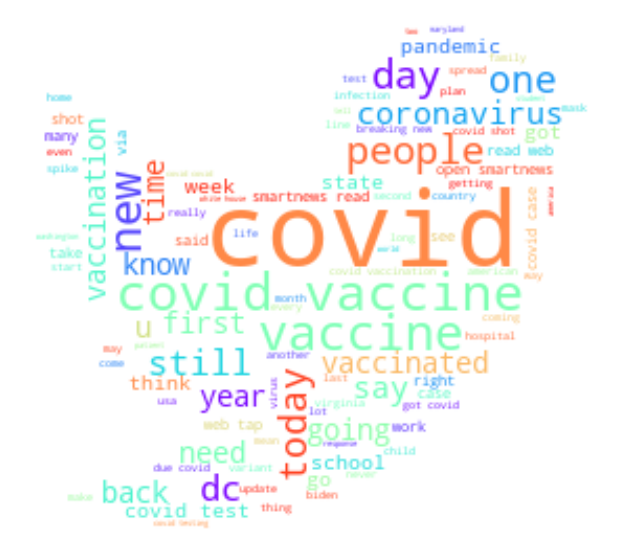

In [55]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

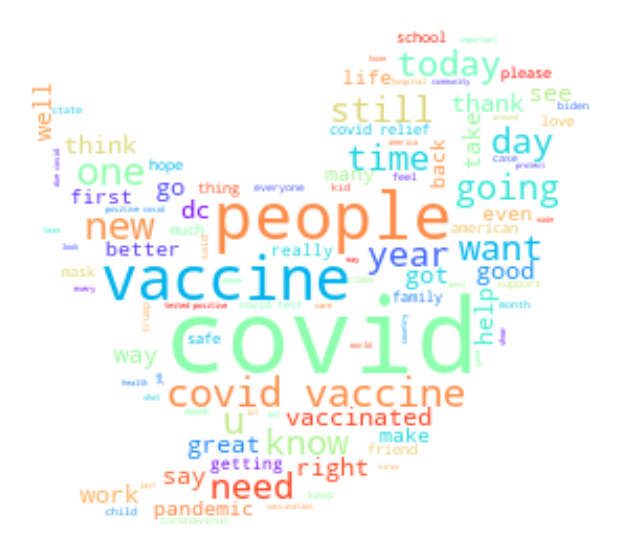

In [56]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [57]:
resampled_us_2021_cases = us_2021_cases.resample("W-MON").sum()
resampled_us_2021_deaths = us_2021_deaths.resample("W-MON").sum()
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

In [58]:
positive_cases_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_2021_cases.values)
positive_deaths_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_2021_deaths.values)
negative_cases_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_2021_cases.values)
negative_deaths_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_2021_deaths.values)
positive_cases_corr[0, 1], positive_deaths_corr[0, 1], negative_cases_corr[0, 1], negative_deaths_corr[0, 1]

(0.5373281232267417,
 0.5167349650797509,
 0.6283134365762965,
 0.6404622939365733)

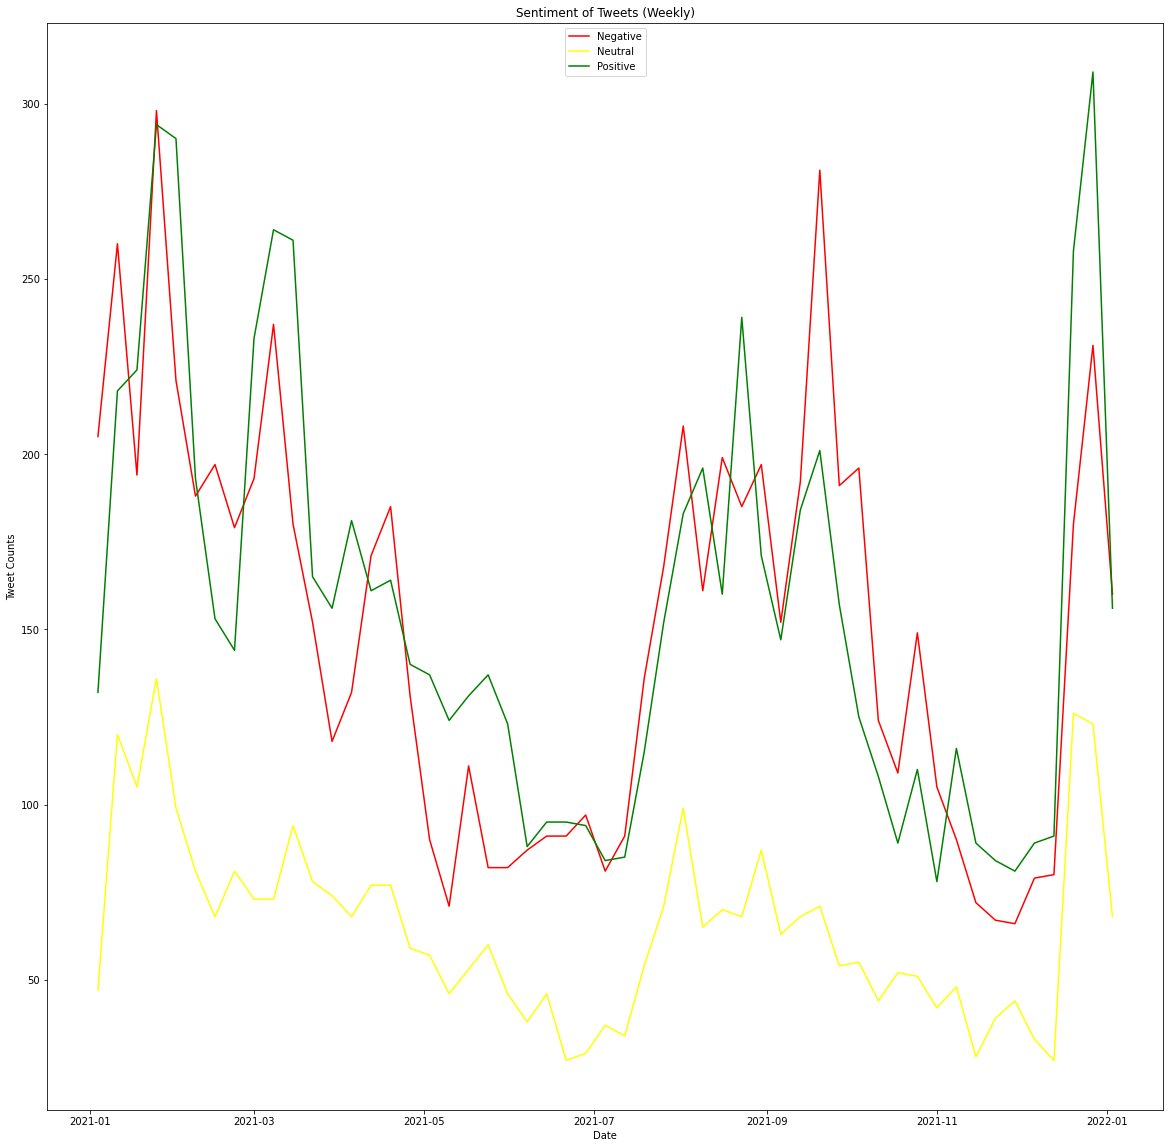

In [59]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()

## Year 2022

In [60]:
us_2022_cases, us_2022_deaths = us_2022["new_cases"].dropna(), us_2022["new_deaths"].dropna()

In [61]:
year_2022 = pd.read_csv("washington_normal_2022.csv")
year_2022["date"] = pd.to_datetime(year_2022['date'])
year_2022["date"] = year_2022["date"].dt.tz_convert("Etc/GMT+8")
dates = year_2022["date"]
year_2022.index = dates
year_2022.drop("date", axis=1, inplace=True)
year_2022["renderedContent"] = year_2022['renderedContent'].apply(lambda tweet:str(tweet))
year_2022.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe
date,,,,,,,,,,,,,,,,,,,,,
2023-02-28 15:58:49-08:00,https://twitter.com/dcexaminer/status/16307191...,newsom end california state emergency nearly t...,newsom end california state emergency nearly t...,1630719199935885313,https://twitter.com/dcexaminer,2,3,9,1,1630719199935885313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='Newsom ends California COVI...,2008.0,NaN
2023-02-28 15:58:18-08:00,https://twitter.com/layla_abouzaid/status/1630...,question everybody making fun many people sayi...,question everybody making fun many people sayi...,1630719070419943424,https://twitter.com/layla_abouzaid,1,1,0,0,1630719070419943424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN
2023-02-28 15:56:27-08:00,https://twitter.com/foxnewspolitics/status/163...,fbi director say covid pandemic likely origina...,fbi director say covid pandemic likely origina...,1630718606840299521,https://twitter.com/foxnewspolitics,10,11,32,0,1630718606840299521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",5121.0,NaN
2023-02-28 15:56:06-08:00,https://twitter.com/thehill/status/16307185169...,john barrasso want congress debriefed energy d...,john barrasso want congress debriefed energy d...,1630718516906131456,https://twitter.com/thehill,12,7,17,1,1630718516906131456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.0,NaN
2023-02-28 15:55:58-08:00,https://twitter.com/NewsPolitics/status/163071...,fbi director say covid pandemic likely origina...,fbi director say covid pandemic likely origina...,1630718483414540289,https://twitter.com/NewsPolitics,0,0,3,0,1630718483414540289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",415.0,NaN


In [62]:
sentiment_scores = year_2022['renderedContent'].apply(sid.polarity_scores)
sentiment_scores

date
2023-02-28 15:58:49-08:00    {'neg': 0.245, 'neu': 0.755, 'pos': 0.0, 'comp...
2023-02-28 15:58:18-08:00    {'neg': 0.143, 'neu': 0.717, 'pos': 0.139, 'co...
2023-02-28 15:56:27-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2023-02-28 15:56:06-08:00    {'neg': 0.0, 'neu': 0.435, 'pos': 0.565, 'comp...
2023-02-28 15:55:58-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
                                                   ...                        
2022-01-07 16:52:11-08:00    {'neg': 0.346, 'neu': 0.385, 'pos': 0.269, 'co...
2022-01-07 14:55:20-08:00    {'neg': 0.069, 'neu': 0.8, 'pos': 0.131, 'comp...
2022-01-07 04:21:09-08:00    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2022-01-03 09:02:10-08:00    {'neg': 0.0, 'neu': 0.774, 'pos': 0.226, 'comp...
2022-01-01 10:00:07-08:00    {'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp...
Name: renderedContent, Length: 10149, dtype: object

In [63]:
sentiments = sentiment_scores.apply(lambda x: x["compound"])
sentiment_label = sentiments.apply(determine_sentiment)
year_2022["Sentiment"] = sentiment_label
year_2022.head()

,url,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,quoteCount,conversationId,...,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card,viewCount,vibe,Sentiment
date,,,,,,,,,,,,,,,,,,,,,
2023-02-28 15:58:49-08:00,https://twitter.com/dcexaminer/status/16307191...,newsom end california state emergency nearly t...,newsom end california state emergency nearly t...,1630719199935885313,https://twitter.com/dcexaminer,2,3,9,1,1630719199935885313,...,NaN,NaN,NaN,NaN,NaN,NaN,SummaryCard(title='Newsom ends California COVI...,2008.0,NaN,Negative
2023-02-28 15:58:18-08:00,https://twitter.com/layla_abouzaid/status/1630...,question everybody making fun many people sayi...,question everybody making fun many people sayi...,1630719070419943424,https://twitter.com/layla_abouzaid,1,1,0,0,1630719070419943424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,Negative
2023-02-28 15:56:27-08:00,https://twitter.com/foxnewspolitics/status/163...,fbi director say covid pandemic likely origina...,fbi director say covid pandemic likely origina...,1630718606840299521,https://twitter.com/foxnewspolitics,10,11,32,0,1630718606840299521,...,NaN,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",5121.0,NaN,Neutral
2023-02-28 15:56:06-08:00,https://twitter.com/thehill/status/16307185169...,john barrasso want congress debriefed energy d...,john barrasso want congress debriefed energy d...,1630718516906131456,https://twitter.com/thehill,12,7,17,1,1630718516906131456,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14055.0,NaN,Positive
2023-02-28 15:55:58-08:00,https://twitter.com/NewsPolitics/status/163071...,fbi director say covid pandemic likely origina...,fbi director say covid pandemic likely origina...,1630718483414540289,https://twitter.com/NewsPolitics,0,0,3,0,1630718483414540289,...,NaN,NaN,NaN,NaN,NaN,NaN,"SummaryCard(title=""FBI director says COVID pan...",415.0,NaN,Neutral


In [64]:
negative = year_2022[year_2022["Sentiment"] == "Negative"]
neutral = year_2022[year_2022["Sentiment"] == "Neutral"]
positive = year_2022[year_2022["Sentiment"] == "Positive"]

In [65]:
negative.renderedContent.iloc[146], negative.renderedContent.iloc[171], negative.renderedContent.iloc[1774]

('even mild case covid leave symptom last month lower risk long covid updated vaccine today find updated vaccine wecandothis ',
 'new research find serious case could lead increased risk long covid symptom ',
 'nation world untrustworthy ineffective panel blast government covid response')

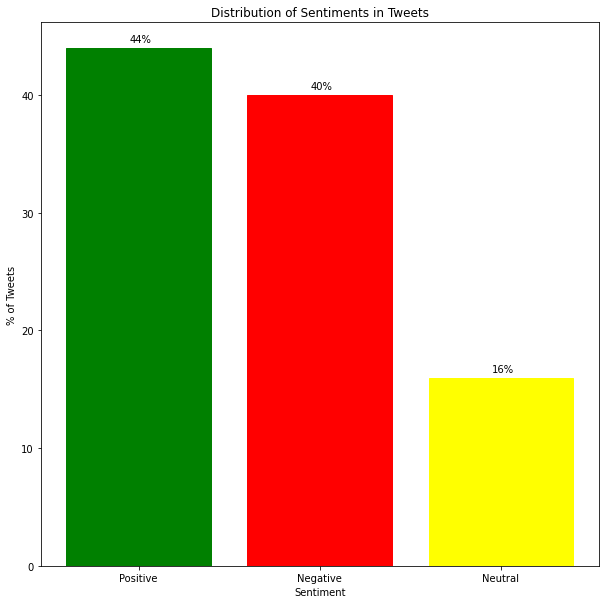

In [66]:
perc_dict = {"Positive": round(len(positive)/len(year_2022)*100), "Negative": round(len(negative)/len(year_2022)*100), "Neutral": round(len(neutral)/len(year_2022)*100)}
fig = plt.figure(figsize=(10, 10))
bar = plt.bar(*zip(*perc_dict.items()))
plt.xlabel('Sentiment')
plt.ylabel('% of Tweets')
bar[0].set_color("green")
bar[1].set_color("red")
bar[2].set_color("yellow")
plt.title('Distribution of Sentiments in Tweets')
plt.text(0-0.05, round(len(positive)/len(year_2022)*100)+0.5, "{}%".format(round(len(positive)/len(year_2022)*100)))
plt.text(1-0.05, round(len(negative)/len(year_2022)*100)+0.5, "{}%".format(round(len(negative)/len(year_2022)*100)))
plt.text(2-0.05, round(len(neutral)/len(year_2022)*100)+0.5, "{}%".format(round(len(neutral)/len(year_2022)*100)))
plt.show()

## Word Clouds

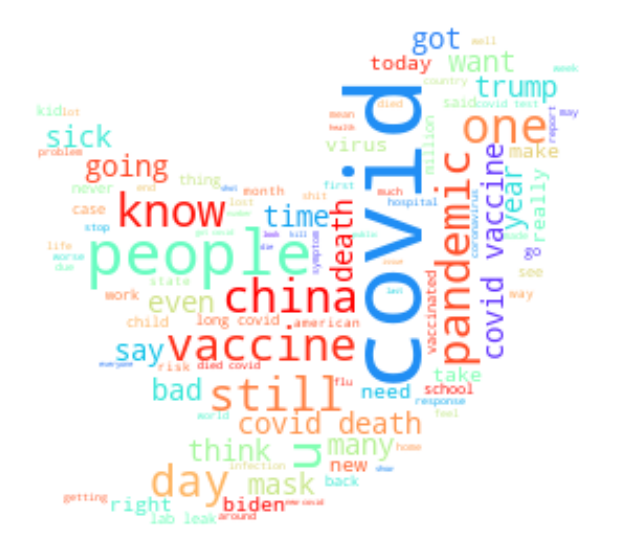

In [67]:
text = " ".join(tweet for tweet in negative.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

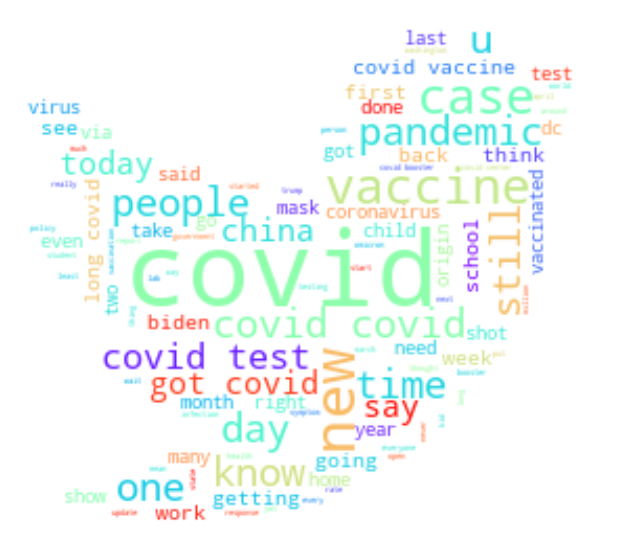

In [68]:
text = " ".join(tweet for tweet in neutral.renderedContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

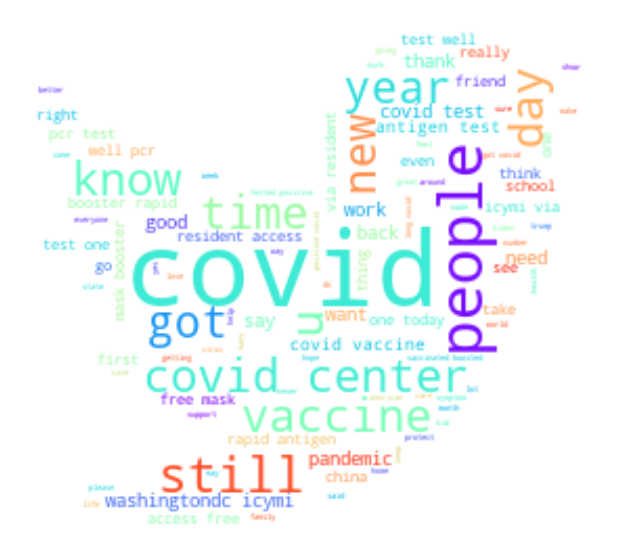

In [69]:
text = " ".join(tweet for tweet in positive.rawContent)
text = remove_mult_spaces(filter_chars(clean_hashtags(strip_all_entities(strip_emoji(text)))))
negative_wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=100, background_color="white", mask=mask, colormap='rainbow').generate(text)
plt.figure(figsize=(30,10))
plt.imshow(negative_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Time Series Analysis

In [70]:
resampled_us_2022_cases = us_2022_cases.resample("W-MON").sum()
resampled_us_2022_deaths = us_2022_deaths.resample("W-MON").sum()
resampled_negative = negative.resample("W-MON").count()
resampled_neutral = neutral.resample("W-MON").count()
resampled_positive = positive.resample("W-MON").count()

In [71]:
positive_cases_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_2022_cases.iloc[:-2].values)
positive_deaths_corr = np.corrcoef(resampled_positive["Sentiment"].values, resampled_us_2022_deaths.iloc[:-2].values) # no deaths
negative_cases_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_2022_cases.iloc[:-2].values)
negative_deaths_corr = np.corrcoef(resampled_negative["Sentiment"].values, resampled_us_2022_deaths.iloc[:-2].values) # no deaths
positive_cases_corr[0, 1], positive_deaths_corr[0, 1], negative_cases_corr[0, 1], negative_deaths_corr[0, 1]

(0.34252517116564274,
 0.11203150583512364,
 0.3265876043352346,
 0.10859519270076473)

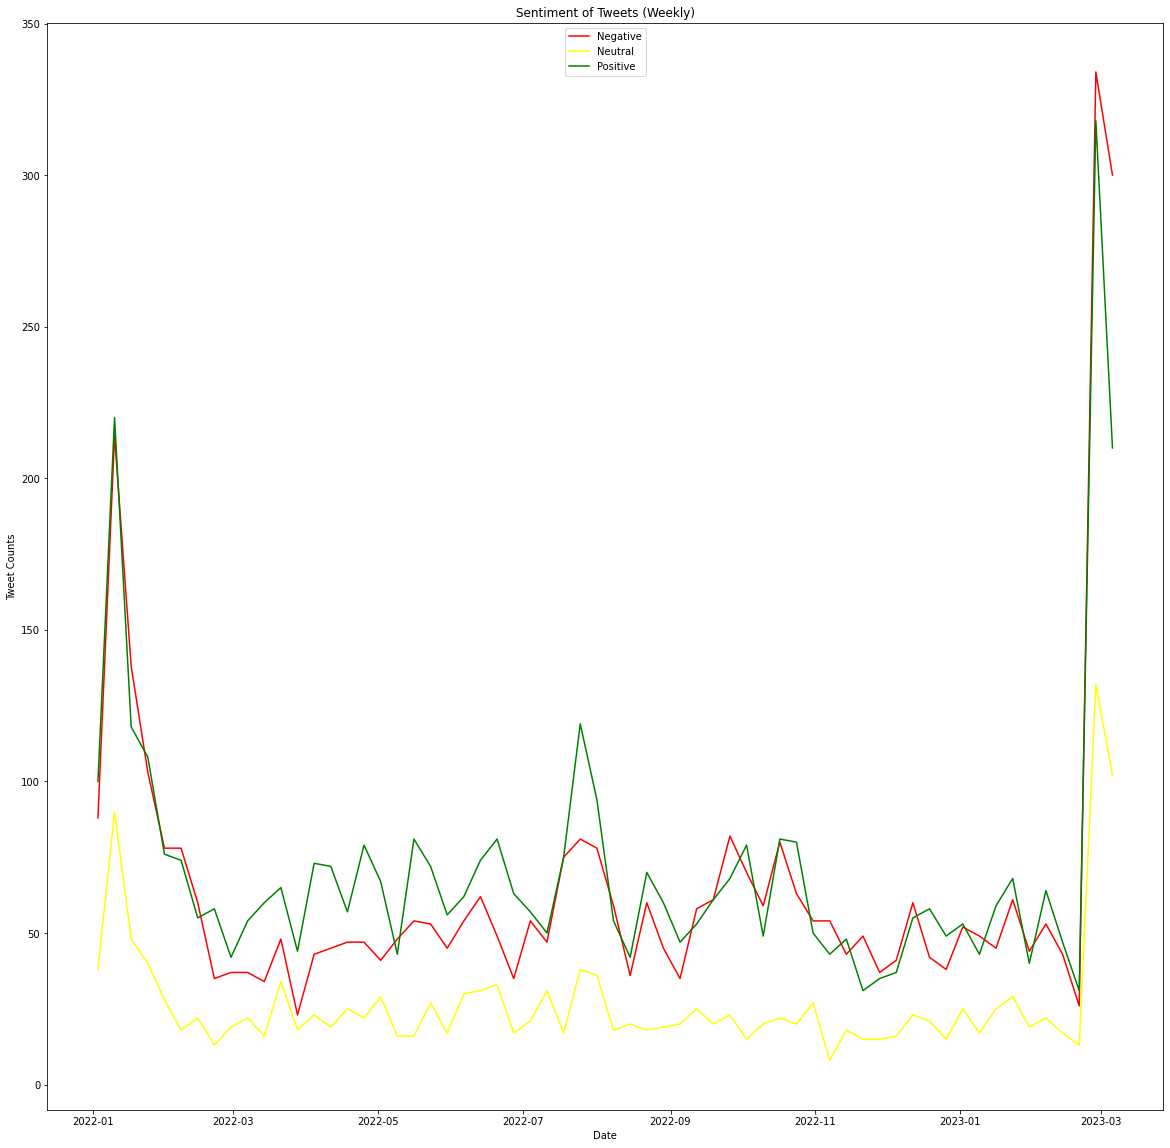

In [72]:
fig = plt.figure(figsize=(20, 20))
plt.plot(resampled_negative.index, resampled_negative["Sentiment"], color = 'red')
plt.plot(resampled_neutral.index, resampled_neutral["Sentiment"], color = 'yellow')
plt.plot(resampled_positive.index, resampled_positive["Sentiment"], color = 'green')
plt.xlabel('Date')
plt.ylabel('Tweet Counts')
plt.title('Sentiment of Tweets (Weekly)')
plt.legend(('Negative', 'Neutral', 'Positive'), loc='upper center')
plt.show()